### Датасет: Цены на акции
https://www.kaggle.com/datasets/nancyalaswad90/yamana-gold-inc-stock-Volume
##### О наборе данных: 
Yamana Gold Inc. — это канадская компания, которая занимается разработкой и управлением золотыми, серебряными и медными рудниками, расположенными в Канаде, Чили, Бразилии и Аргентине. Головной офис компании находится в Торонто.

Yamana Gold была основана в 1994 году и уже через год была зарегистрирована на фондовой бирже Торонто. В 2007 году она стала участником Нью-Йоркской фондовой биржи, а в 2020 году — Лондонской.
В 2003 году компания претерпела значительные изменения: была проведена реструктуризация, в результате которой Питер Марроне занял пост главного исполнительного директора. Кроме того, Yamana объединилась с бразильской компанией Santa Elina Mines Corporation. Благодаря этому слиянию Yamana получила доступ к капиталу, накопленному Santa Elina, что позволило ей начать разработку и эксплуатацию рудника Чапада. Затем компания объединилась с другими организациями, зарегистрированными на бирже TSX: RNC Gold, Desert Sun Mining, Viceroy Exploration, Northern Orion Resources, Meridian Gold, Osisko Mining и Extorre Gold Mines. Каждая из них внесла свой вклад в разработку месторождения или проект, который в итоге был успешно запущен.
##### Таким образом:
* Объект наблюдения - цены и объемы акций компании
* Атрибуты: 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

##### Бизнес цели:
*  Прогнозирование будущей цены акций.
        Использование данных для создания модели, которая будет предсказывать цену акций компании в будущем.
*  Определение волатильности акций.
        Определение, колебаний цен акций, что поможет инвесторам понять риски.

##### Технические цели:
*  Разработать модель машинного обучения для прогноза цены акций на основе имеющихся данных.
*  Разработать метрику и модель для оценки волатильности акций на основе исторических данных.

In [31]:
import pandas as pd
df = pd.read_csv(".//static//csv//Stocks.csv", sep=",")
print('Количество колонок: ' + str(df.columns.size))  
print('Колонки: ' + ', '.join(df.columns)+'\n')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.info()
df.head()

Количество колонок: 7
Колонки: Date, Open, High, Low, Close, Adj Close, Volume

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5251 entries, 0 to 5250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5251 non-null   datetime64[ns]
 1   Open       5251 non-null   float64       
 2   High       5251 non-null   float64       
 3   Low        5251 non-null   float64       
 4   Close      5251 non-null   float64       
 5   Adj Close  5251 non-null   float64       
 6   Volume     5251 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 287.3 KB


Date      Open      High       Low     Close  Adj Close  Volume
0 2001-06-22  3.428571  3.428571  3.428571  3.428571   2.806002       0
1 2001-06-25  3.428571  3.428571  3.428571  3.428571   2.806002       0
2 2001-06-26  3.714286  3.714286  3.714286  3.714286   3.039837       0
3 2001-06-27  3.714286  3.714286  3.714286  3.714286   3.039837       0
4 2001-06-28  3.714286  3.714286  3.714286  3.714286   3.039837       0

### Подготовка данных:

#### 1. Получение сведений о пропущенных данных
Типы пропущенных данных:

- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [32]:
import numpy as np
# Количество пустых значений признаков
print(df.isnull().sum())
print()

# Есть ли пустые значения признаков
print(df.isnull().any())
print()

# Проверка на бесконечные значения
print("Количество бесконечных значений в каждом столбце:")
print(np.isinf(df).sum())

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    print(f"{i} процент пустых значений: %{null_rate:.2f}")

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Количество бесконечных значений в каждом столбце:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Date процент пустых значений: %0.00
Open процент пустых значений: %0.00
High процент пустых значений: %0.00
Low процент пустых значений: %0.00
Close процент пустых значений: %0.00
Adj Close процент пустых значений: %0.00
Volume процент пустых значений: %0.00


Таким образом, пропущенных значений не найдено.

#### 2. Проверка выбросов данных и устранение их при наличии:

In [33]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        print("До устранения выбросов:")
        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        if outlier_count != 0:
            df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        print("После устранения выбросов:")
        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")


До устранения выбросов:
Колонка Open:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 1.142857
  Максимальное значение: 20.42
  1-й квартиль (Q1): 2.857143
  3-й квартиль (Q3): 10.65

После устранения выбросов:
Колонка Open:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 1.142857
  Максимальное значение: 20.42
  1-й квартиль (Q1): 2.857143
  3-й квартиль (Q3): 10.65

До устранения выбросов:
Колонка High:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 1.142857
  Максимальное значение: 20.59
  1-й квартиль (Q1): 2.88
  3-й квартиль (Q3): 10.86

После устранения выбросов:
Колонка High:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 1.142857
  Максимальное значение: 20.59
  1-й квартиль (Q1): 2.88
  3-й квартиль (Q3): 10.86

До устранения выбросов:
Колонка Low:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 1.142857
  Максимальное значение: 20.09
  1-й квартиль (Q1): 2.81
  3-й квар

Выбросы присутствовали, но мы их устранили.

### Разбиение на выборки:

Разобьем наш набор на обучающую, контрольную и тестовую выборки для устранения проблемы просачивания данных.

In [34]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тестовая)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Разделение данных на обучающую и контрольную выборки (80% - обучение, 20% - контроль)
X_train, X_val = train_test_split(df, test_size=0.2, random_state=42)

print("Размер обучающей выборки: ", len(X_train))
print("Размер контрольной выборки: ", len(X_test))
print("Размер тестовой выборки: ", len(X_val))


Размер обучающей выборки:  4200
Размер контрольной выборки:  1051
Размер тестовой выборки:  1051


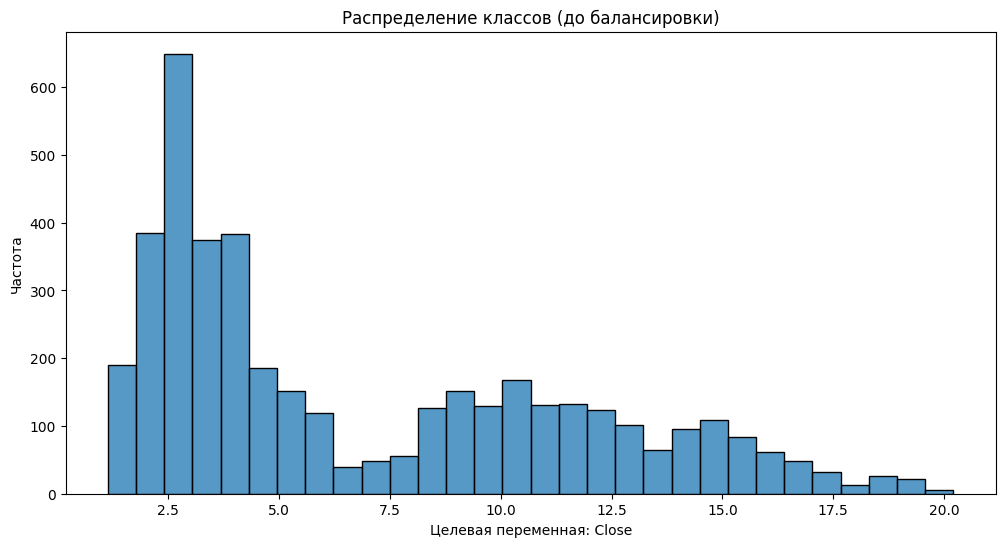

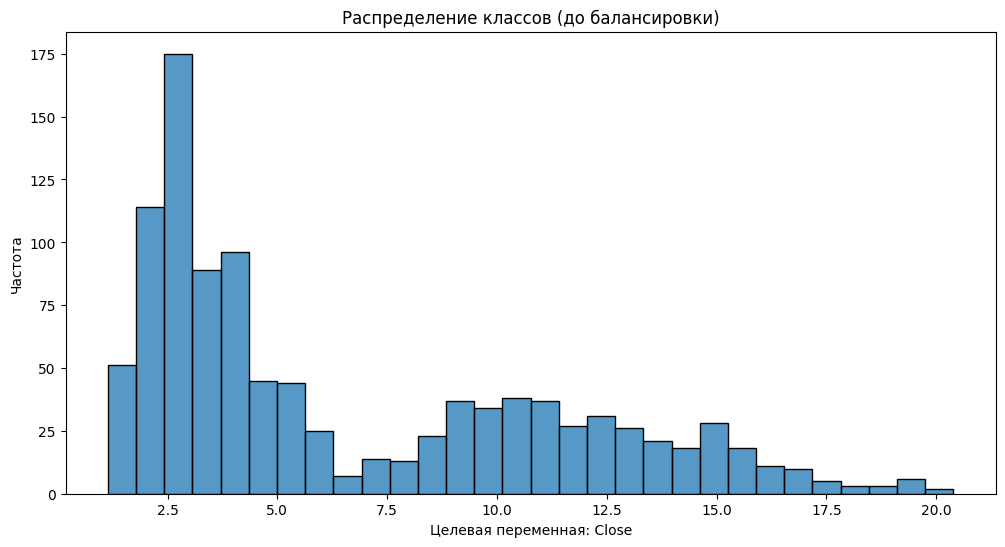

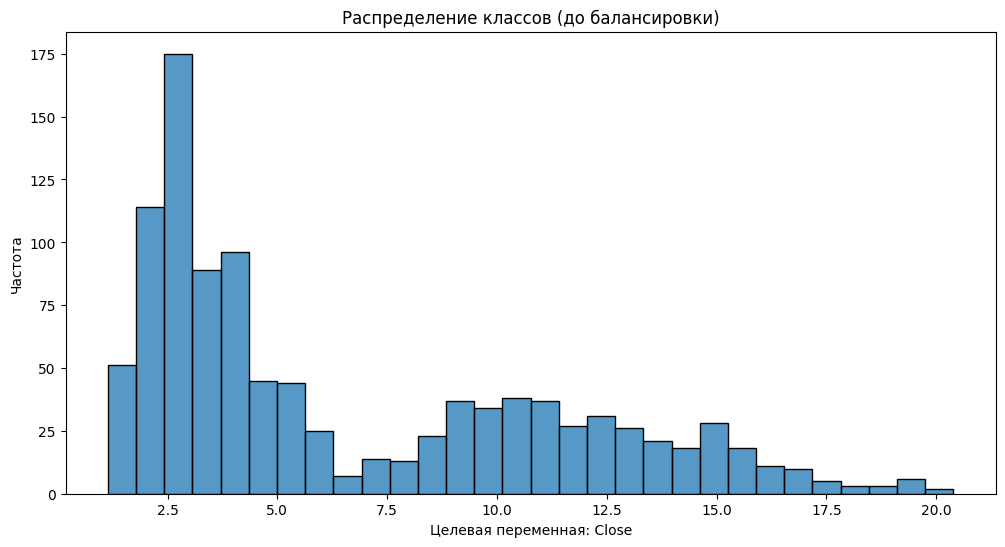

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма распределения цены закрытия в обучающей выборке
plt.figure(figsize=(12, 6))
sns.histplot(X_train['Close'], bins=30, kde=False)
plt.title("Распределение классов (до балансировки)")
plt.xlabel('Целевая переменная: Close')
plt.ylabel('Частота')
plt.show()

# Гистограмма распределения цены закрытия в контрольной выборке
plt.figure(figsize=(12, 6))
sns.histplot(X_val['Close'], bins=30, kde=False)
plt.title("Распределение классов (до балансировки)")
plt.xlabel('Целевая переменная: Close')
plt.ylabel('Частота')
plt.show()

# Гистограмма распределения цены закрытия в тестовой выборке
plt.figure(figsize=(12, 6))
sns.histplot(X_test['Close'], bins=30, kde=False)
plt.title("Распределение классов (до балансировки)")
plt.xlabel('Целевая переменная: Close')
plt.ylabel('Частота')
plt.show()

##### Применим овер- и андерсемплинг к обучающей выборке:

           Date   Open   High    Low      Close  Adj Close      Volume  \
4789 2020-07-08   5.66   5.73   5.47   5.560000   5.341250  23355100.0   
3469 2015-04-10   3.86   3.93   3.81   3.880000   3.513961   7605300.0   
2503 2011-06-07  12.19  12.28  11.95  12.020000  10.138681   7243200.0   
1580 2007-10-08  11.77  11.84  11.53  11.570000   9.509553   3025900.0   
2759 2012-06-12  15.77  16.17  15.76  16.120001  13.771020   6113400.0   

     closePrice_category  
4789                high  
3469              medium  
2503           very_high  
1580           very_high  
2759           very_high  


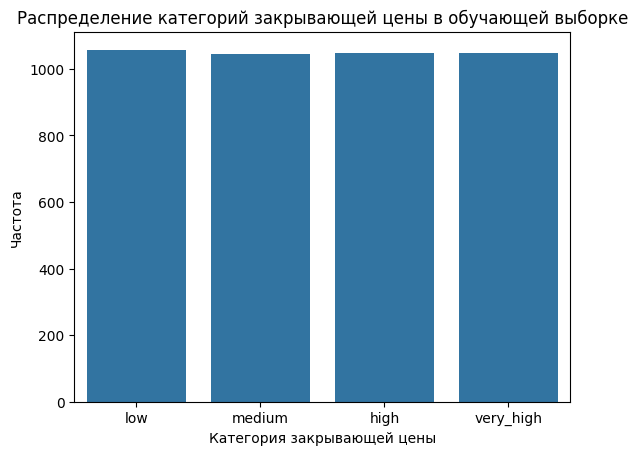

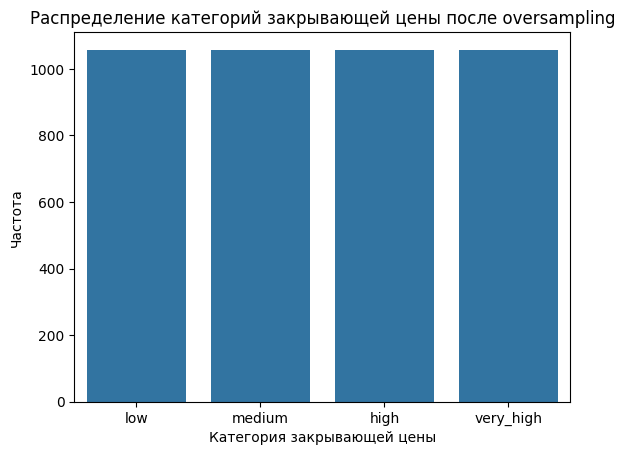

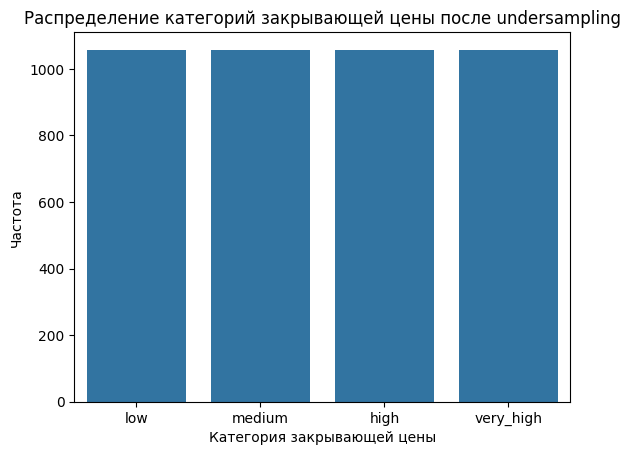

Размер обучающей выборки до oversampling и undersampling:  4200
Размер обучающей выборки после oversampling и undersampling:  4232


Date   Open   High    Low  Close  Adj Close      Volume
0  2020-07-08   5.66   5.73   5.47   5.56   5.341250  23355100.0
20 2021-01-19   5.15   5.15   5.02   5.13   4.966732  15906300.0
21 2010-04-08  10.60  10.65  10.48  10.52   8.794909  10456400.0
24 2020-12-07   5.47   5.80   5.47   5.75   5.541336  12929600.0
28 2021-01-05   6.15   6.16   5.98   6.04   5.847770  15080900.0

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразование целевой переменной (цены) в категориальные диапазоны с использованием квантилей
X_train['closePrice_category'] = pd.qcut(X_train['Close'], q=4, labels=['low', 'medium', 'high', 'very_high'])
print(X_train.head())

# Визуализация распределения цен после преобразования в категории
sns.countplot(x=X_train['closePrice_category'])
plt.title('Распределение категорий закрывающей цены в обучающей выборке')
plt.xlabel('Категория закрывающей цены')
plt.ylabel('Частота')
plt.show()

# Балансировка категорий с помощью RandomOverSampler (увеличение меньшинств)
ros = RandomOverSampler(random_state=42)
y_train = X_train['closePrice_category']
X_train = X_train.drop(columns=['closePrice_category'])


# Применяем oversampling. Здесь важно, что мы используем X_train как DataFrame и y_train_categories как целевую переменную
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Визуализация распределения цен после oversampling
sns.countplot(x=y_resampled)
plt.title('Распределение категорий закрывающей цены после oversampling')
plt.xlabel('Категория закрывающей цены')
plt.ylabel('Частота')
plt.show()

# Применение RandomUnderSampler для уменьшения большего класса
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Визуализация распределения цен после undersampling
sns.countplot(x=y_resampled)
plt.title('Распределение категорий закрывающей цены после undersampling')
plt.xlabel('Категория закрывающей цены')
plt.ylabel('Частота')
plt.show()


print("Размер обучающей выборки до oversampling и undersampling: ", len(X_train))


print("Размер обучающей выборки после oversampling и undersampling: ", len(X_resampled))
X_resampled.head()


По сути, балансировка так то  не требовалась, но все же мы ее провели, добавив в обучающую выборку 5 значений (ーー;)

### Конструирование признаков
1. **Унитарное кодирование категориальных признаков. Преобразование категориальных признаков в бинарные векторы.**
* В данном датасете категориальные признаки отсутствуют, так что пропустим этот пункт.
2. **Дискретизация числовых признаков. Преобразование непрерывных числовых значений в дискретные категории или интервалы (бины).**

In [37]:
#Пример дискретизации по цене закрытия
# Проверка на наличие числовых признаков
print("Названия столбцов в датасете:")
print(df.columns)

# Выводим основные статистические параметры для количественных признаков
print("Статистические параметры:")
print(df.describe())

# Дискретизация столбца 'Close' на группы
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 30]  # Определяем границы корзин
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16+']  # Названия категорий

# Создание нового столбца 'Close_Disc' на основе дискретизации
df['Close_Disc'] = pd.cut(df['Close'], bins=bins, labels=labels, include_lowest=True)

# Проверка результата
print("После дискретизации 'Close':")
print(df.head())
n = len(df)
middle_index = n // 2
print(df.iloc[middle_index - 2: middle_index + 3])
print(df.tail())

Названия столбцов в датасете:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Статистические параметры:
                                Date         Open         High          Low  \
count                           5251  5251.000000  5251.000000  5251.000000   
mean   2011-12-01 11:59:51.772995840     6.863639     6.986071     6.720615   
min              2001-06-22 00:00:00     1.142857     1.142857     1.142857   
25%              2006-09-13 12:00:00     2.857143     2.880000     2.810000   
50%              2011-11-29 00:00:00     4.600000     4.710000     4.490000   
75%              2017-02-16 12:00:00    10.650000    10.860000    10.425000   
max              2022-05-05 00:00:00    20.420000    20.590000    20.090000   
std                              NaN     4.753836     4.832010     4.662891   

             Close    Adj Close        Volume  
count  5251.000000  5251.000000  5.251000e+03  
mean      6.850606     5.895644  8.976705e+06  
m

### Конструирование новых признаков:

In [38]:
print('\nИсходный датасет: ')
print(df.tail())
print('\nОбучающая выборка: ')
print(X_resampled.tail())
print('\nТестовая выборка: ')
print(X_test.tail())
print('\nКонтрольная выборка: ')
print(X_val.tail())

#Объем изменений
df['Volume_Change'] = df['Volume'].pct_change()
X_resampled['Volume_Change'] = X_resampled['Volume'].pct_change()
X_test['Volume_Change'] = X_test['Volume'].pct_change()
X_val['Volume_Change'] = X_val['Volume'].pct_change()

# Проверка создания новых признаков
print("\nНовые признаки в обучающей выборке:")
print(X_resampled[['Volume_Change']].tail())

print("\nНовые признаки в тестовой выборке:")
print(X_test[['Volume_Change']].tail())

print("\nНовые признаки в контрольной выборке:")
print(X_val[['Volume_Change']].tail())

print("\nНовые признаки в датасете:")
print(df[['Volume_Change']].tail())



Исходный датасет: 
           Date  Open  High   Low  Close  Adj Close      Volume Close_Disc
5246 2022-04-29  5.66  5.69  5.50   5.51       5.51  16613300.0        4-6
5247 2022-05-02  5.33  5.39  5.18   5.30       5.30  27106700.0        4-6
5248 2022-05-03  5.32  5.53  5.32   5.47       5.47  18914200.0        4-6
5249 2022-05-04  5.47  5.61  5.37   5.60       5.60  20530700.0        4-6
5250 2022-05-05  5.63  5.66  5.34   5.44       5.44  19879200.0        4-6

Обучающая выборка: 
           Date       Open   High        Low      Close  Adj Close      Volume
2435 2011-04-14  12.530000  12.84  12.480000  12.750000  10.754427  10527200.0
1756 2013-05-30  11.510000  11.76  11.480000  11.720000  10.166282   9028100.0
3296 2009-11-20  13.100000  13.28  12.870000  13.220000  11.031483  17024900.0
1243 2012-09-17  18.870001  19.00  18.469999  18.870001  16.178450   6652400.0
343  2006-12-12  12.920000  13.00  12.580000  12.800000  10.487218   3981100.0

Тестовая выборка: 
           Date

##### Проверим новые признаки:

In [39]:
print('\nИсходный датасет: ')
print(df[['Volume_Change']].isnull().sum())
print('\nОбучающая выборка: ')
print(X_resampled[['Volume_Change']].isnull().sum())
print('\nТестовая выборка: ')
print(X_test[['Volume_Change']].isnull().sum())
print('\nКонтрольная выборка: ')
print(X_val[['Volume_Change']].isnull().sum())
print()

# Есть ли пустые значения признаков
print('Есть ли пустые значения признаков: ')
print('\nИсходный датасет: ')
print(df[['Volume_Change']].isnull().any())
print('\nОбучающая выорка: ')
print(X_resampled[['Volume_Change']].isnull().any())
print('\nТестовая выборка: ')
print(X_test[['Volume_Change']].isnull().any())
print('\nКонтрольная выборка: ')
print(X_val[['Volume_Change']].isnull().any())
print()

# Проверка на бесконечные значения
print("Количество бесконечных значений в каждом столбце:")
print('\nИсходный датасет: ')
print(np.isinf(df[['Volume_Change']]).sum())
print('\nОбучающая выборка: ')
print(np.isinf(X_resampled[['Volume_Change']]).sum())
print('\nТестовая выборка: ')
print(np.isinf(X_test[['Volume_Change']]).sum())
print('\nКонтрольная выборка: ')
print(np.isinf(X_val[['Volume_Change']]).sum())

# Процент пустых значений признаков
for i in df[['Volume_Change']].columns:
    null_rate = df[['Volume_Change']][i].isnull().sum() / len(df[['Volume_Change']]) * 100
    print(f"{i} процент пустых значений в датасете: %{null_rate:.2f}")

# Процент пустых значений признаков
for i in X_resampled[['Volume_Change']].columns:
    null_rate = X_resampled[['Volume_Change']][i].isnull().sum() / len(X_resampled[['Volume_Change']]) * 100
    print(f"{i} процент пустых значений в обучающей выборке: %{null_rate:.2f}")

# Процент пустых значений признаков
for i in X_test[['Volume_Change']].columns:
    null_rate = X_test[['Volume_Change']][i].isnull().sum() / len(X_test[['Volume_Change']]) * 100
    print(f"{i} процент пустых значений в тестовой выборке: %{null_rate:.2f}")

# Процент пустых значений признаков
for i in X_val[['Volume_Change']].columns:
    null_rate = X_val[['Volume_Change']][i].isnull().sum() / len(X_val[['Volume_Change']]) * 100
    print(f"{i} процент пустых значений в контрольной выборке: %{null_rate:.2f}")


Исходный датасет: 
Volume_Change    501
dtype: int64

Обучающая выборка: 
Volume_Change    102
dtype: int64

Тестовая выборка: 
Volume_Change    16
dtype: int64

Контрольная выборка: 
Volume_Change    16
dtype: int64

Есть ли пустые значения признаков: 

Исходный датасет: 
Volume_Change    True
dtype: bool

Обучающая выорка: 
Volume_Change    True
dtype: bool

Тестовая выборка: 
Volume_Change    True
dtype: bool

Контрольная выборка: 
Volume_Change    True
dtype: bool

Количество бесконечных значений в каждом столбце:

Исходный датасет: 
Volume_Change    32
dtype: int64

Обучающая выборка: 
Volume_Change    310
dtype: int64

Тестовая выборка: 
Volume_Change    107
dtype: int64

Контрольная выборка: 
Volume_Change    107
dtype: int64
Volume_Change процент пустых значений в датасете: %9.54
Volume_Change процент пустых значений в обучающей выборке: %2.41
Volume_Change процент пустых значений в тестовой выборке: %1.52
Volume_Change процент пустых значений в контрольной выборке: %1.52


Заполним пустые данные

In [40]:
# Заменяем бесконечные значения на NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
X_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_val.replace([np.inf, -np.inf], np.nan, inplace=True)

fillna_df = df[['Volume_Change']].fillna(0)
fillna_X_resampled = X_resampled[['Volume_Change']].fillna(0)
fillna_X_test = X_test[['Volume_Change']].fillna(0)
fillna_X_val = X_val[['Volume_Change']].fillna(0)


print(fillna_df.shape)
print(fillna_X_resampled.shape)
print(fillna_X_test.shape)
print(fillna_X_val.shape)

print(fillna_df.isnull().any())
print(fillna_X_resampled.isnull().any())
print(fillna_X_test.isnull().any())
print(fillna_X_val.isnull().any())

# Замена пустых данных на 0
df["Volume_Change"] = df["Volume_Change"].fillna(0)
X_resampled["Volume_Change"] = X_resampled["Volume_Change"].fillna(0)
X_test["Volume_Change"] = X_test["Volume_Change"].fillna(0)
X_val["Volume_Change"] = X_val["Volume_Change"].fillna(0)

# Вычисляем медиану для колонки "Volume_Change"
median_Volume_Change_df = df["Volume_Change"].median()
median_Volume_Change_train = X_resampled["Volume_Change"].median()
median_Volume_Change_test = X_test["Volume_Change"].median()
median_Volume_Change_val = X_val["Volume_Change"].median()

# Заменяем значения 0 на медиану
df[['Volume_Change']].loc[df["Volume_Change"] == 0, "Volume_Change"] = median_Volume_Change_df
X_resampled[['Volume_Change']].loc[X_resampled["Volume_Change"] == 0, "Volume_Change"] = median_Volume_Change_train
X_test[['Volume_Change']].loc[X_test["Volume_Change"] == 0, "Volume_Change"] = median_Volume_Change_test
X_val[['Volume_Change']].loc[X_val["Volume_Change"] == 0, "Volume_Change"] = median_Volume_Change_val

print(df[['Volume_Change']].tail())
print(X_resampled[['Volume_Change']].tail())
print(X_test[['Volume_Change']].tail())
print(X_val[['Volume_Change']].tail())


(5251, 1)
(4232, 1)
(1051, 1)
(1051, 1)
Volume_Change    False
dtype: bool
Volume_Change    False
dtype: bool
Volume_Change    False
dtype: bool
Volume_Change    False
dtype: bool
      Volume_Change
5246      -0.218393
5247       0.631626
5248      -0.302232
5249       0.085465
5250      -0.031733
      Volume_Change
2435       0.977868
1756      -0.142403
3296       0.885768
1243      -0.609255
343       -0.401554
      Volume_Change
3095       0.000000
859       -0.963951
3134      24.250355
2577       1.722270
378       -1.000000
      Volume_Change
3095       0.000000
859       -0.963951
3134      24.250355
2577       1.722270
378       -1.000000


C:\Users\K\AppData\Local\Temp\ipykernel_21516\2904461267.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[['Volume_Change']].loc[df["Volume_Change"] == 0, "Volume_Change"] = median_Volume_Change_df
C:\Users\K\AppData\Local\Temp\ipyker

Удалим наблюдения с пропусками

In [41]:
dropna_df = df[['Volume_Change']].dropna()
dropna_X_resampled = X_resampled[['Volume_Change']].dropna()
dropna_X_test = X_test[['Volume_Change']].dropna()
dropna_X_val = X_val[['Volume_Change']].dropna()

print(dropna_df.shape)
print(dropna_X_resampled.shape)
print(dropna_X_test.shape)
print(dropna_X_val.shape)

print(dropna_df.isnull().any())
print(df[['Volume_Change']].tail())
print(dropna_X_resampled.isnull().any())
print(X_resampled[['Volume_Change']].tail())
print(dropna_X_test.isnull().any())
print(X_test[['Volume_Change']].tail())
print(dropna_X_val.isnull().any())
print(X_val[['Volume_Change']].tail())

(5251, 1)
(4232, 1)
(1051, 1)
(1051, 1)
Volume_Change    False
dtype: bool
      Volume_Change
5246      -0.218393
5247       0.631626
5248      -0.302232
5249       0.085465
5250      -0.031733
Volume_Change    False
dtype: bool
      Volume_Change
2435       0.977868
1756      -0.142403
3296       0.885768
1243      -0.609255
343       -0.401554
Volume_Change    False
dtype: bool
      Volume_Change
3095       0.000000
859       -0.963951
3134      24.250355
2577       1.722270
378       -1.000000
Volume_Change    False
dtype: bool
      Volume_Change
3095       0.000000
859       -0.963951
3134      24.250355
2577       1.722270
378       -1.000000


##### Масштабируем новые признаки:


In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['Volume_Change']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
X_resampled[numerical_features] = scaler.fit_transform(X_resampled[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Вывод результатов после масштабирования
print("Результаты после масштабирования:")
print("\n Датафрейм:")
print(df[numerical_features].tail())
print("\n Обучающая:")
print(X_resampled[numerical_features].tail())
print("\n Тестовая:")
print(X_val[numerical_features].tail())
print("\n Контрольная:")
print(X_test[numerical_features].tail())

Результаты после масштабирования:

 Датафрейм:
      Volume_Change
5246      -0.176620
5247       0.224373
5248      -0.216171
5249      -0.033276
5250      -0.088564

 Обучающая:
      Volume_Change
2435      -0.033736
1756      -0.033805
3296      -0.033742
1243      -0.033834
343       -0.033821

 Тестовая:
      Volume_Change
3095      -0.033796
859       -0.033856
3134      -0.032301
2577      -0.033690
378       -0.033858

 Контрольная:
      Volume_Change
3095      -0.033796
859       -0.033856
3134      -0.032301
2577      -0.033690
378       -0.033858


Данные признаки предоставляют важную информацию о текущем тренде и возможных изменениях в будущих ценах. Положительные значения Price_Change и Percentage_Change, наряду с высоким Volume_Change, могут поддерживать гипотезу о росте цен на акции.

Также, эти признаки помогают понять уровень рискованности инвестиций. Высокие значения Price_Range и резкие изменения в Volume_Change могут указывать на склонность к большим колебаниям, что требует внимательного управления рисками.

### Применим featuretools для конструирования признаков:

In [43]:
import featuretools as ft

df['id'] = df.index 
X_resampled['id'] = X_resampled.index
X_val['id'] = X_val.index
X_test['id'] = X_test.index
 # Добавляем уникальный идентификатор
# Предобработка данных (например, кодирование категориальных признаков, удаление дубликатов)
# Удаление дубликатов по идентификатору
df = df.drop_duplicates(subset='id')
duplicates = X_resampled[X_resampled['id'].duplicated(keep=False)]

# Удаление дубликатов из столбца "id", сохранив первое вхождение
df = df.drop_duplicates(subset='id', keep='first')

print(duplicates)


# Создание EntitySet
es = ft.EntitySet(id='stock_data')

# Добавление датафрейма с домами
es = es.add_dataframe(dataframe_name='stocks', dataframe=df, index='id')

# Генерация признаков с помощью глубокой синтезы признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='stocks', max_depth=2)

# Выводим первые 5 строк сгенерированного набора признаков
print(feature_matrix.head())

X_resampled = X_resampled.drop_duplicates(subset='id')
X_resampled = X_resampled.drop_duplicates(subset='id', keep='first')  # or keep='last'

# Определение сущностей (Создание EntitySet)
es = ft.EntitySet(id='stock_data')

es = es.add_dataframe(dataframe_name='stocks', dataframe=X_resampled, index='id')

# Генерация признаков
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='stocks', max_depth=2)

# Преобразование признаков для контрольной и тестовой выборок
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=X_val.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=X_test.index)

print(feature_matrix.head())


c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_Change, id]
Index: []


c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


        Open      High       Low     Close  Adj Close  Volume Close_Disc  \
id                                                                         
0   3.428571  3.428571  3.428571  3.428571   2.806002     0.0        2-4   
1   3.428571  3.428571  3.428571  3.428571   2.806002     0.0        2-4   
2   3.714286  3.714286  3.714286  3.714286   3.039837     0.0        2-4   
3   3.714286  3.714286  3.714286  3.714286   3.039837     0.0        2-4   
4   3.714286  3.714286  3.714286  3.714286   3.039837     0.0        2-4   

    Volume_Change DAY(Date) MONTH(Date) WEEKDAY(Date) YEAR(Date)  
id                                                                
0       -0.073594        22           6             4       2001  
1       -0.073594        25           6             0       2001  
2       -0.073594        26           6             1       2001  
3       -0.073594        27           6             2       2001  
4       -0.073594        28           6             3       2001 

c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)
c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\featuretools\computational_backends\feature_set_calculator.py:143: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, default_df], sort=True)


Система сгенерировала следующие признаки:
1. **Open, High, Low, Close, Adj Close**: Это стандартные финансовые параметры акций, отражающие цены открытия, максимальные, минимальные и закрытия за определенный период.
**Volume**: Объем торгов акциями, который показывает, сколько акций было куплено/продано за определенный период.

2. Сложные признаки:
**Close_Disc**: Это диапазон цены закрытия.
**Price_Change**: Изменение цены, т.е. разница между ценой закрытия и ценой открытия акций.
**Percentage_Change**: Процентное изменение цен, которое позволяет оценить относительное изменение стоимости акций.
**Average_Price**: Средняя цена акций за указанный период. Этот показатель может быть использован для оценки общей тенденции рынка.

3. Также произошло разбиение даты на месяц, день недели и год, что может помочь в анализе сезонных и временных закономерностей.

### Оценим качество каждого набора признаков:

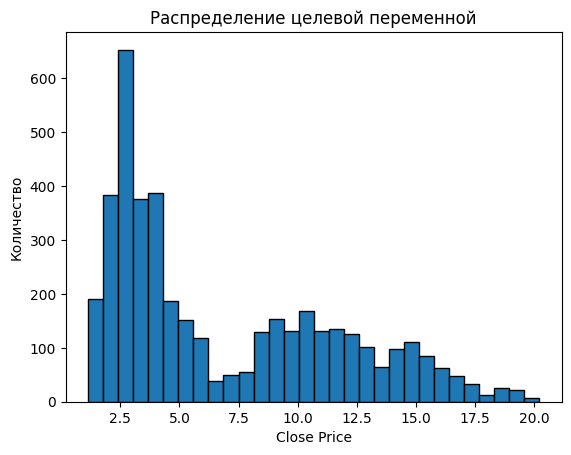

Размер feature_matrix:  4232
Размер y_train_categories:  4232
Коэффициент детерминации R²: 1.00
Время обучения модели: 45.54 секунд
Среднеквадратичная ошибка: 0.00


In [44]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
y = feature_matrix['Close']
X = feature_matrix.drop('Close', axis=1)

plt.hist(y, bins=30, edgecolor='k')
plt.title('Распределение целевой переменной')
plt.xlabel('Close Price')
plt.ylabel('Количество')
plt.show()

print("Размер feature_matrix: ", feature_matrix.shape[0])
print("Размер y_train_categories: ", y.shape[0])

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели и вычисляем среднеквадратичную ошибку
predictions = model.predict(X_val)
mse = mean_squared_error(y_val, predictions)

r2 = r2_score(y_val, predictions)
print(f'Коэффициент детерминации R²: {r2:.2f}')

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')

В данном случае среднеквадратичные ошибки как в случае с контрольной выборкой, так и в случае с тестовой достаточно малы, что может значит о том, что предсказания модели близки к реальным значениям.

c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



RMSE: 0.09582857422264315
R²: 0.9995934815979668
MAE: 0.05673237514757995 

Кросс-валидация RMSE: 0.10266281621290554 

Train RMSE: 0.03608662827625366
Train R²: 0.9999422411727147
Train MAE: 0.022020514230428674



c:\Users\K\source\repos\AIM-PIbd-31-Ievlewa-M-D\aimenv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


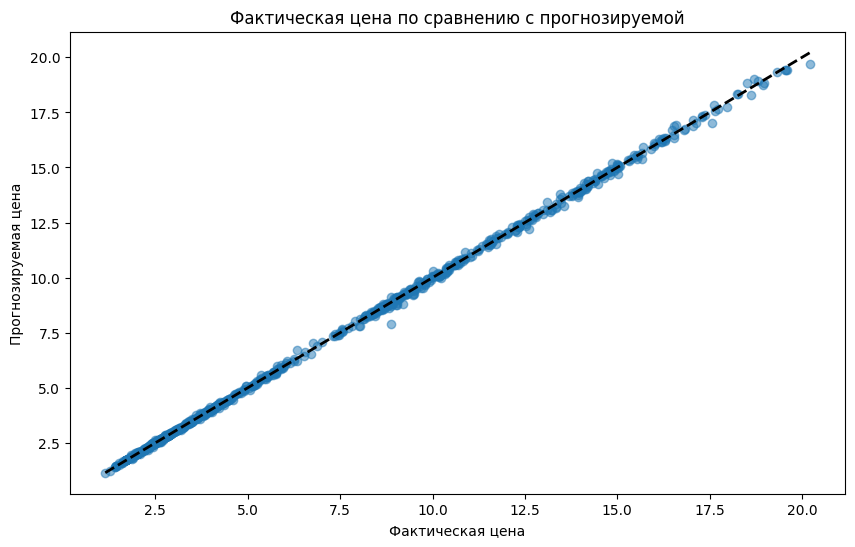

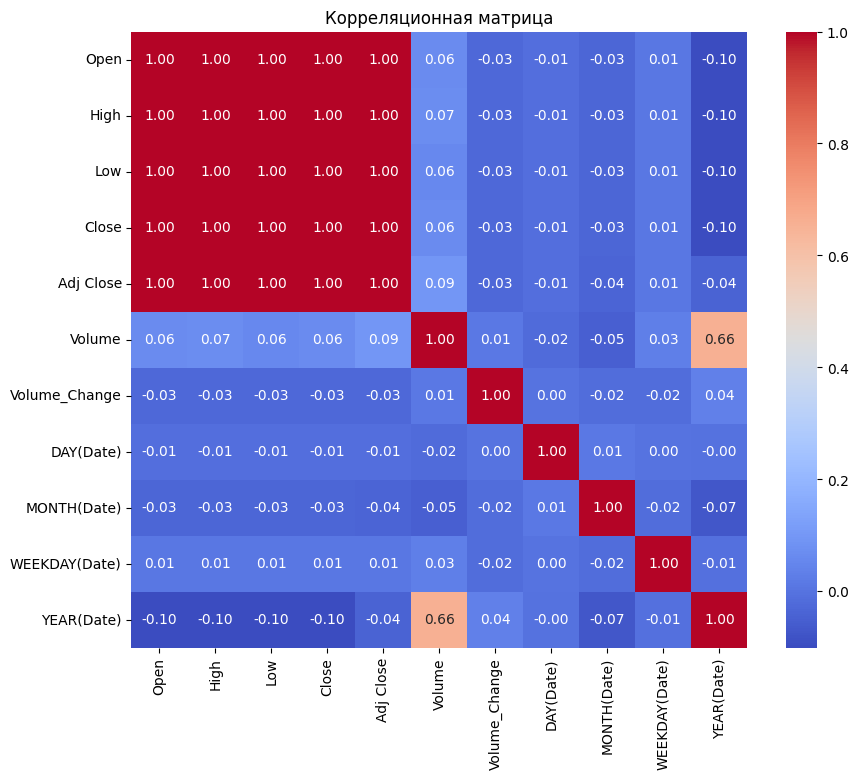

Корреляция признаков с 'Close':
Close            1.000000
Low              0.999572
High             0.999527
Open             0.998976
Adj Close        0.997764
Volume           0.062913
WEEKDAY(Date)    0.009135
DAY(Date)       -0.011068
Volume_Change   -0.030591
MONTH(Date)     -0.034877
YEAR(Date)      -0.100269
Name: Close, dtype: float64


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


# Удаление строк с NaN
feature_matrix = feature_matrix.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
y_train = feature_matrix['Close']
X_train = feature_matrix.drop('Close', axis=1)
y_val = val_feature_matrix['Close']
X_val = val_feature_matrix.drop('Close', axis=1)
y_test = test_feature_matrix['Close']
X_test = test_feature_matrix.drop('Close', axis=1)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

# Кодирования категориальных переменных с использованием одноразового кодирования
X = pd.get_dummies(X, drop_first=True)

# Разобьём тренировочный тест и примерку модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print()
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae} \n")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Кросс-валидация RMSE: {rmse_cv} \n")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print()

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактическая цена')
plt.ylabel('Прогнозируемая цена')
plt.title('Фактическая цена по сравнению с прогнозируемой')
plt.show()

correlation_matrix = feature_matrix.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

# Рассмотрим корреляцию с целевой переменной 'Close'
correlation_with_close = correlation_matrix['Close'].sort_values(ascending=False)
print("Корреляция признаков с 'Close':")
print(correlation_with_close)


На основании представленных данных о корреляции признаков с целевой переменной 'Close', а также значений Mean Squared Error (MSE), можно сделать несколько важных выводов:

**Эффективность модели**
Эффективность модели можно оценивать по нескольким критериям:

* Точность предсказаний: График сравнения фактических и прогнозируемых цен показывает, что точки близки к линии равенства, это указывает на высокую точность модели. Высокая точность означает, что ваша модель хорошо прогнозирует цены, что критически важно для принятия обоснованных инвестиционных решений.
* Метрики оценки: Использование таких метрик, как средняя абсолютная ошибка (MAE), средняя квадратичная ошибка (MSE) или коэффициент детерминации (R²), позволит оценить, насколько близки прогнозы к реальным значениям. Эти меры позволяют количественно оценить уровень ошибки модели. В данном случае среднеквадратичные ошибки достаточно малы(~1.5e-10), что может значит о том, что предсказания модели близки к реальным значениям.

**Высокая корреляция признаков**

* Показатели High, Low, Open и Average Price имеют крайне высокую положительную корреляцию с целевой переменной Close:
Это говорит о том, что данные переменные практически линейно зависимы от значения Close. Таким образом, знание значений этих признаков позволяет с высокой степенью уверенности предсказывать значение Close.

Year имеет наибольшую отрицательную корреляцию (-0.09) с Close, что говорит об их наименьшей зависимости друг от друга.

**Переобучение**
Переобучение (overfitting) — это распространенная проблема в моделях машинного обучения:

* Признаки переобучения: Если модель показывает отличные результаты на обучающей выборке, но значительно хуже на тестовой, это свидетельствует о том, что модель слишком сложна и запоминает данные вместо того, чтобы их обобщать.
В данном случае модель показала одинаково хорошие результаты на 